In [1]:
import sympy
from sympy.utilities.lambdify import lambdify
import numpy.linalg as la
import numpy as np
from sympy import init_printing
init_printing()

In [10]:
z, r,tau=sympy.symbols('z r tau')

In [28]:
t=1.-r**2

In [11]:
e=sympy.exp

In [12]:
dim=2

In [22]:
T_denom = (1.-r**2* e(z)**2)

In [23]:
T_denom

In [74]:
## transfer function in the program
T_program = -r*sympy.eye(dim) + ((1.-r**2)/T_denom) * sympy.Matrix([[r*e(z)**2,e(z)],[e(z),r*e(z)**2]])

In [35]:
## coefficients of transfer between the two internal nodes
M1 = sympy.Matrix([[0,r],[r,0]])

In [36]:
## from inputs to internal nodes
M2 = sympy.Matrix([[t,0],[0,t]])

In [37]:
## from internal nodes to outputs
M3 = sympy.Matrix([[0,t],[t,0]])

In [66]:
## from inputs to outputs. Note the phase shift 
M4 = sympy.Matrix([[-r,0],[0,-r]])

In [67]:
M = np.vstack([np.hstack([M1,M2]),np.hstack([M3,M4])])

In [68]:
print M

[[0 r -r**2 + 1.0 0]
 [r 0 0 -r**2 + 1.0]
 [0 -r**2 + 1.0 -r 0]
 [-r**2 + 1.0 0 0 -r]]


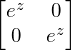

In [56]:
E = sympy.Matrix([[e(z),0],[0,e(z)]])
E

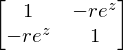

In [57]:
sympy.eye(2)-M1*E

In [69]:
##inverse of sympy.eye(2)-M1*E
inv = sympy.Matrix([[1,r*e(z)],[r*e(z),1]])/(1-r**2*e(2*z))

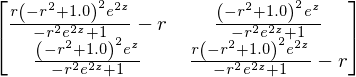

In [72]:
##derived transfer function
T = M3*E*inv*M2+M4
T

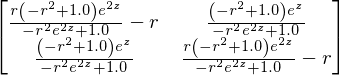

In [75]:
## transfer function in code
T_program